In [2]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import seaborn

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')  # стиль графиков

% matplotlib inline

In [20]:
np.random.seed(404)
m_x = -1
m_y = 1 / 2
var_x = 2 ** 2
var_y = (0 - -2) ** 2 / 12
n1 = 100
n2 = 100
X = np.random.normal(-1, 2, n1)
# np.random.seed(284)
Y = np.random.uniform(-2, 0, n2)


In [21]:
var_y

0.3333333333333333

In [22]:
m1 = np.mean(X)
v1 = np.var(X, ddof=1)
s1 = np.std(X, ddof=1)
m1, v1, s1

(-0.7764808262435907, 4.019749373354324, 2.004931263997428)

In [23]:
m2 = np.mean(Y)
v2 = np.var(Y, ddof=1)
s2 = np.std(Y, ddof=1)
m2, v2, s2

(-0.9711955586251331, 0.3292866458052031, 0.5738350336161109)

In [24]:
coef, p = stats.pearsonr(X, Y)
print(f'Pirson correlation coefficient: {coef:.3f}')
print('Pirson p-value: %.3f' % p)

coef, p = stats.spearmanr(X, Y)
print(f'Spearmans correlation coefficient: {coef:.3f}')
print('Spearmans p-value: %.3f' % p)

coef, p = stats.kendalltau(X, Y)
print(f'Kendall correlation coefficient: {coef:.3f}')
print(f'Kendall p-value: {p:.3f}')

Pirson correlation coefficient: -0.064
Pirson p-value: 0.525
Spearmans correlation coefficient: -0.091
Spearmans p-value: 0.368
Kendall correlation coefficient: -0.067
Kendall p-value: 0.323


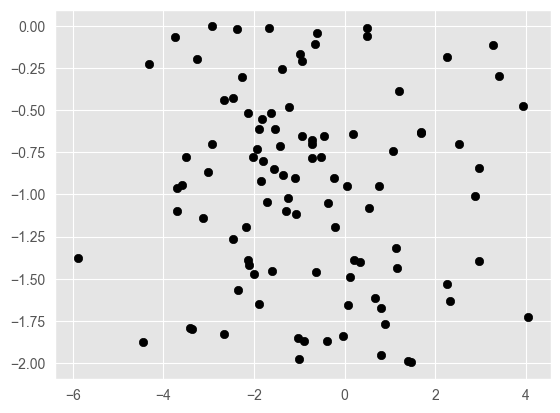

In [25]:
plt.scatter(X, Y, color='black')

array([[ 1.,  1.,  0.,  0.,  1.],
       [ 3.,  5.,  6.,  7.,  5.],
       [ 6.,  2., 12., 13.,  6.],
       [ 7.,  5.,  2.,  4.,  3.],
       [ 2.,  2.,  2.,  2.,  3.]])

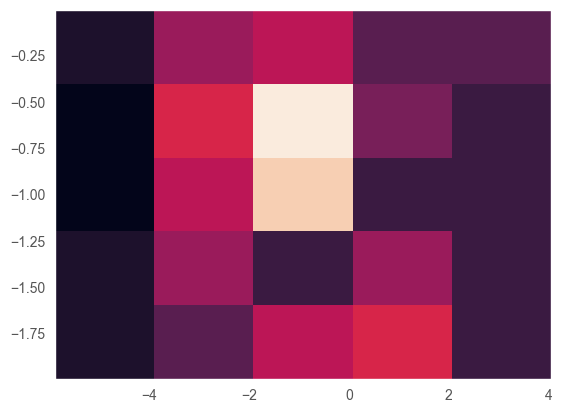

In [39]:
res = plt.hist2d(X, Y, bins=5)
res[0]

In [40]:
res[0]

array([[ 1.,  1.,  0.,  0.,  1.],
       [ 3.,  5.,  6.,  7.,  5.],
       [ 6.,  2., 12., 13.,  6.],
       [ 7.,  5.,  2.,  4.,  3.],
       [ 2.,  2.,  2.,  2.,  3.]])

In [41]:
"X bins: ", res[1]

('X bins: ',
 array([-5.89244296, -3.90297667, -1.91351038,  0.07595592,  2.06542221,
         4.0548885 ]))

In [42]:
"Y bins: ", res[2]

('Y bins: ',
 array([-1.99721138, -1.59841112, -1.19961087, -0.80081062, -0.40201036,
        -0.00321011]))

In [43]:
chi2, p_value, ddof, array = stats.chi2_contingency(res[0], correction=True)
print("Z: ", chi2, ", p-value: ", p_value)
array

Z:  15.394267396475714 , p-value:  0.4959732849828594


array([[ 0.57,  0.45,  0.66,  0.78,  0.54],
       [ 4.94,  3.9 ,  5.72,  6.76,  4.68],
       [ 7.41,  5.85,  8.58, 10.14,  7.02],
       [ 3.99,  3.15,  4.62,  5.46,  3.78],
       [ 2.09,  1.65,  2.42,  2.86,  1.98]])

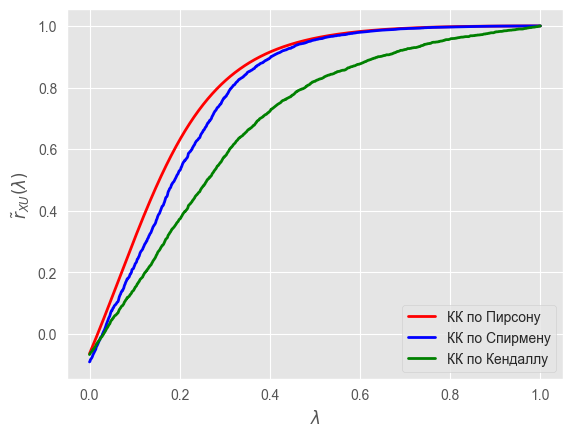

In [75]:
x = np.linspace(0, 1, 1000)

y = np.zeros((1000,))
y_p = np.zeros((1000,))
y_t = np.zeros((1000,))
for i in range(0, 1000):
    lam = x[i]
    U = lam * X + (1 - lam) * Y
    y[i] =  stats.pearsonr(X, U)[0]
    y_p[i] = stats.spearmanr(X, U)[0]
    y_t[i] = stats.kendalltau(X, U)[0]

plt.plot(x, y, lw=2, color='red', label="КК по Пирсону")
plt.plot(x, y_p, lw=2, color='blue', label="КК по Спирмену")
plt.plot(x, y_t, lw=2, color='green', label="КК по Кендаллу")
plt.legend()

plt.ylabel(r'$\tilde{r}_{XU}(\lambda)$')
plt.xlabel('$\lambda$');

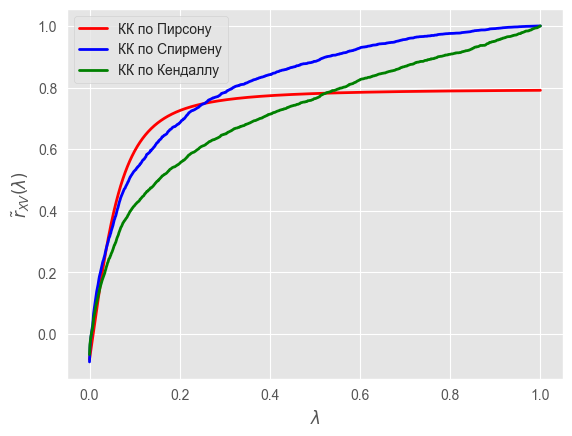

In [76]:
x = np.linspace(0, 1, 1000)
y = np.zeros((1000,))
y_p = np.zeros((1000,))
y_t = np.zeros((1000,))

for i in range(0, 1000):
    lam = x[i]
    V = lam * (X ** 3) + (1 - lam) * (Y ** 3)
    y[i] = stats.pearsonr(X, V)[0]
    y_p[i] = stats.spearmanr(X, V)[0]
    y_t[i] = stats.kendalltau(X, V)[0]

plt.plot(x, y, lw=2, color='red', label="КК по Пирсону")
plt.plot(x, y_p, lw=2, color='blue', label="КК по Спирмену")
plt.plot(x, y_t, lw=2, color='green', label="КК по Кендаллу")
plt.legend()

plt.ylabel(r'$\tilde{r}_{XV}(\lambda)$')
plt.xlabel('$\lambda$');

Text(0.5, 0, '$X$')

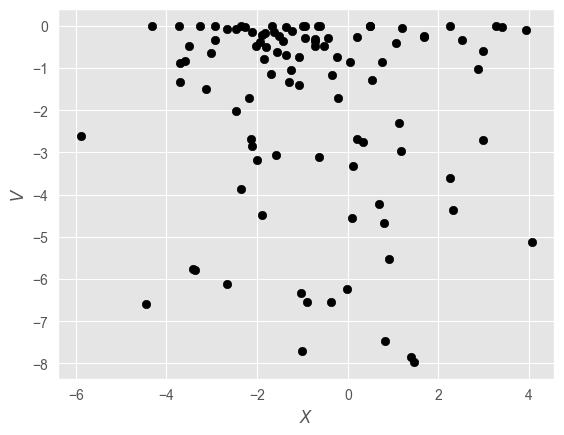

In [78]:
plt.xlabel('$lambda$')
lam = 0

U = lam * (X ** 3) + (1 - lam) * (Y ** 3)


plt.scatter(X, U, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$')

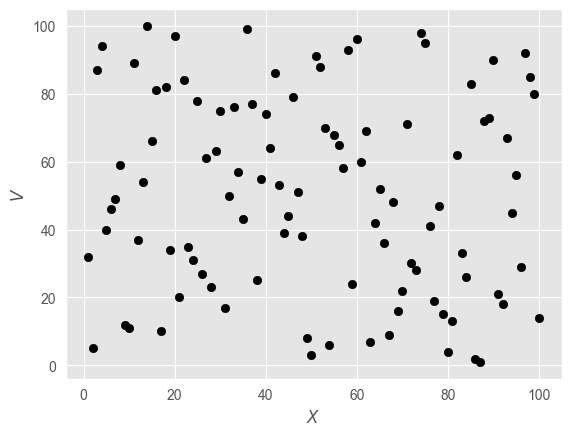

In [79]:
plt.xlabel('$X$')
lam = 0

R = lam * (X ** 3) + (1 - lam) * (Y ** 3)

R_rank = stats.rankdata(R)
X_rank = stats.rankdata(X)
plt.scatter(X_rank, R_rank, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$');

Text(0.5, 0, '$X$')

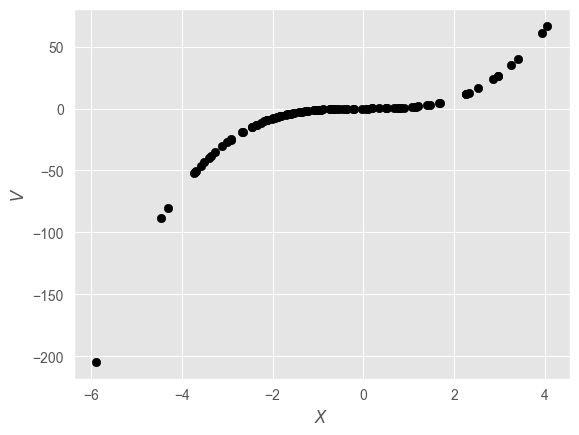

In [80]:
lam = 1


U = lam * (X ** 3) + (1 - lam) * (Y ** 3)

plt.scatter(X, U, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$')

Text(0.5, 0, '$X$')

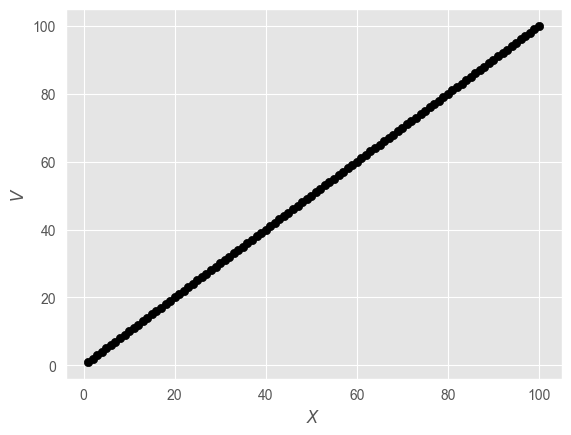

In [81]:
plt.xlabel('$X$')
lam = 1

R = lam * (X ** 3) + (1 - lam) * Y ** 3


R_rank = stats.rankdata(R)
X_rank = stats.rankdata(X)
plt.scatter(X_rank, R_rank, color='black')
plt.ylabel('$V$')
plt.xlabel('$X$')